## Project Name : Flight Price Prediction

# Dataset Description

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable.

The dataset is provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

### FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
                                          ''' Importing libraries '''
        
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
                                          ''' Loading the dataset '''

df_train = pd.read_excel('flight_train.xlsx')
df_test = pd.read_excel('flight_test.xlsx')

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
df_train.shape

(10683, 11)

In [6]:
df_test.shape

(2671, 10)

In [7]:
                                          ''' Creating a single DataFrame '''

df= pd.concat([df_train,df_test],ignore_index=True)  #making the two dataframes into one.
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [8]:
                                          ''' Finding the Null Values '''

df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

<AxesSubplot:>

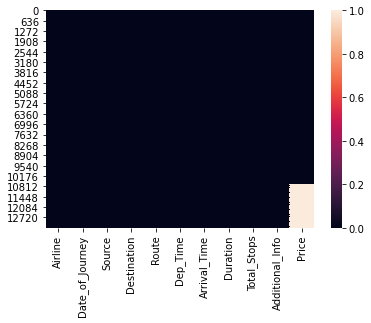

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [11]:
                                          ''' Dropping the Null Values '''

df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

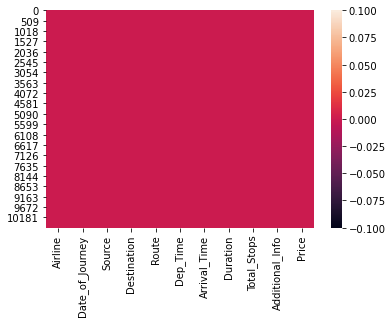

In [13]:
sns.heatmap(df.isnull())

As we can see there are no null values present in the dataset.

In [14]:
df.isna().values.any()

False

This verifies we have no null values in the dataset.

## Feature Engineering:

We are converting the datatypes of the following columns, and spliting the values of these columns to create new seperate columns :

1. Date_of_Journey

2. Dep_Time 

3. Arrival_Time

4. Duration

In [15]:
              ''' Converting "Date_of_Journey" column into Date-time format creating seperate new columns '''

#we are creating two new columns "Journey_day" and "Journey_month"
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

df["Journey_month"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month


In [16]:
                                          ''' Dropping "Date_of_Journey" column '''
    
df.drop(["Date_of_Journey"],axis = 1, inplace= True)

In [17]:
              ''' Converting "Dep_Time" column into Date-time format creating seperate new columns '''
    
# we are creating new columns Hour="Dep_hr" and Minutes="Dep_min"
df["Dep_hr"] = pd.to_datetime(df.Dep_Time).dt.hour

df["Dep_min"] = pd.to_datetime(df.Dep_Time).dt.minute

In [18]:
                                          ''' Dropping "Dep_Time" column '''
    
df.drop(["Dep_Time"],axis = 1, inplace= True)

In [19]:
              ''' Converting "Arrival_Time" column into Date-time format creating seperate new columns '''
    
# we are creating new columns Hour="Arrival_hr" and Minutes="Arrival_min"
df["Arrival_hr"] = pd.to_datetime(df.Arrival_Time).dt.hour

df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

In [20]:
                                          ''' Dropping "Arrival_Time" column '''
    
df.drop(["Arrival_Time"],axis = 1, inplace= True)

In [21]:
              ''' Converting "Duration" column into list format and creating new columns '''
    
dur = list(df["Duration"])

for i in range(len(dur)):
    
    #checking the duration is hour or minutes
    if len(dur[i].split()) != 2:
        if "h" in dur[i]:
            dur[i] = dur[i].strip() + " 0m"   # we are adding the 0 min
        else:
            dur[i] = "0h " + dur[i]           # we are adding the 0 hr

            
# We are creating new columns as "duration_hr" and "duration_min"
duration_hr = []
duration_min = []
for i in range(len(dur)):
    
    #extracting Hours from the column
    duration_hr.append(int(dur[i].split(sep = "h")[0]))
    
    #extracting Minutes from this column
    duration_min.append(int(dur[i].split(sep = "m")[0].split()[-1]))

In [22]:
df["Duration_hr"] = duration_hr
df["Duration_min"] = duration_min

## Encoding:

#### One Hot Encoding

Using One Hot Encoding to convert all the categorical data into numeric.

In [23]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,16,50,21,35,4,45


In [24]:
from sklearn.preprocessing import OneHotEncoder
Oenc= OneHotEncoder()

Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)

Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)

Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

In [25]:
df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [26]:
                                          ''' Labelling the stops '''

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [27]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,...,0,0,1,0,0,1,0,0,0,0


In [28]:
df.dtypes

Airline                                       object
Source                                        object
Destination                                   object
Route                                         object
Duration                                      object
Total_Stops                                    int64
Additional_Info                               object
Price                                        float64
Journey_day                                    int64
Journey_month                                  int64
Dep_hr                                         int64
Dep_min                                        int64
Arrival_hr                                     int64
Arrival_min                                    int64
Duration_hr                                    int64
Duration_min                                   int64
Airline_Air India                              uint8
Airline_GoAir                                  uint8
Airline_IndiGo                                

## Visualization:

In [29]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hr',
       'Dep_min', 'Arrival_hr', 'Arrival_min', 'Duration_hr', 'Duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

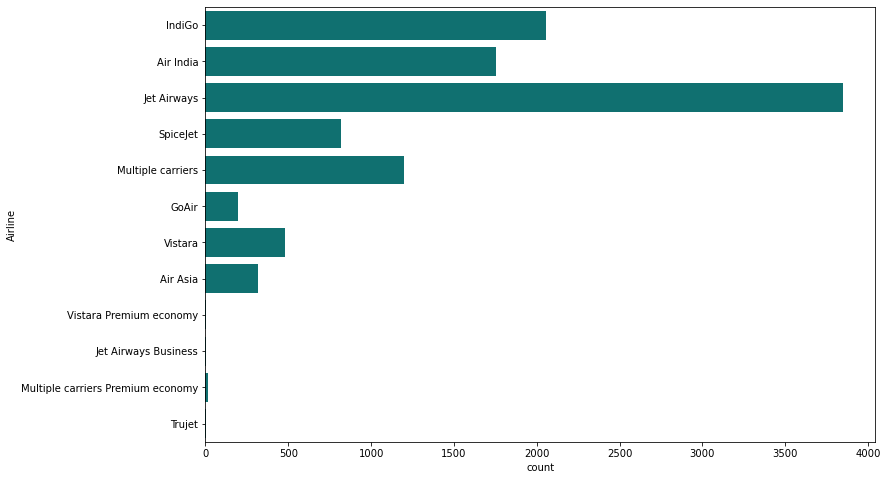

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(y="Airline", data=df, color="teal")
plt.show()

<Figure size 1080x720 with 0 Axes>

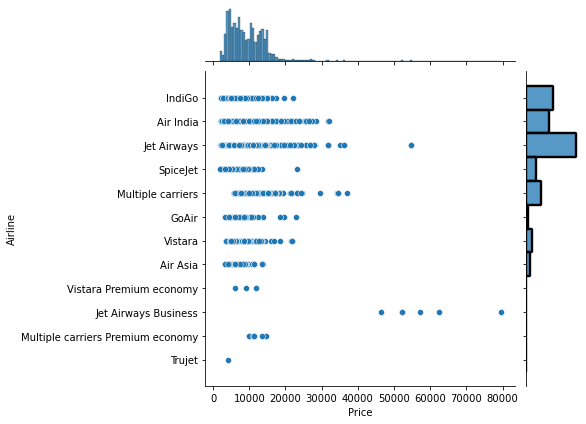

In [31]:
plt.figure(figsize=(15,10))
sns.jointplot(data=df, x="Price", y="Airline")
plt.show()

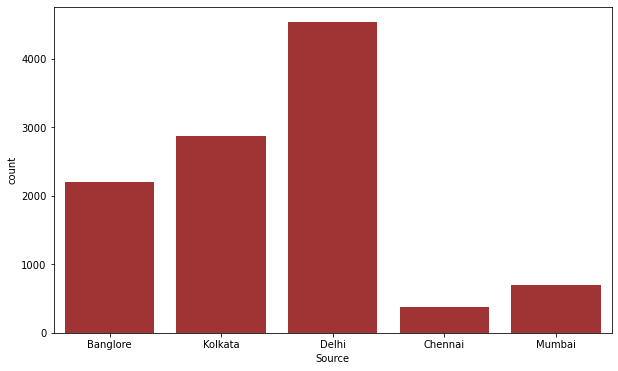

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x="Source", data=df, color="firebrick")
plt.show()

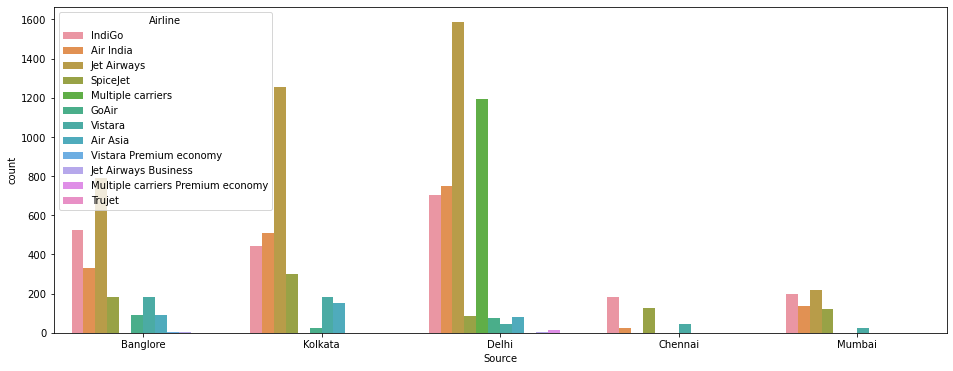

In [33]:
plt.figure(figsize=(16,6))
sns.countplot(x="Source",hue="Airline",data=df_train)
plt.show()

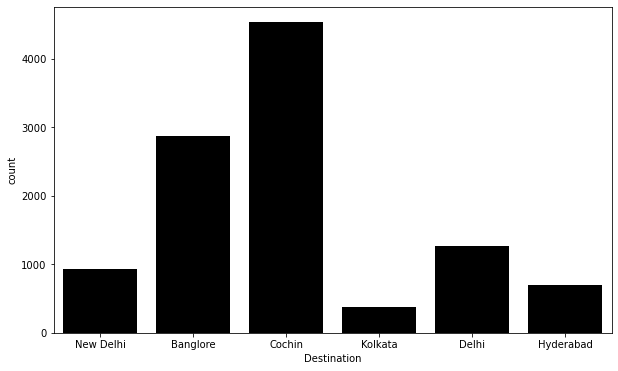

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x="Destination", data=df, color="black")
plt.show()

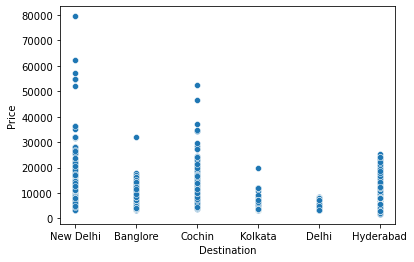

In [35]:
sns.scatterplot(x = "Destination", y = "Price", data = df)
plt.show()

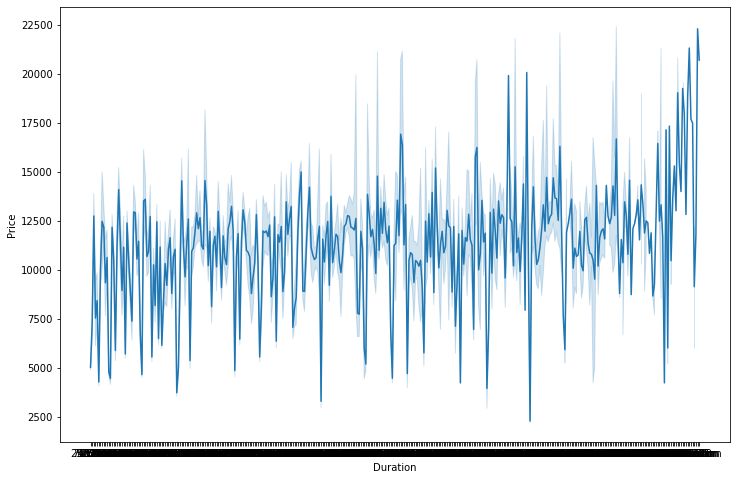

In [36]:
plt.figure(figsize=(12,8))
sns.lineplot(x ="Duration", y ="Price", data = df)
plt.show()

In [37]:
                                          ''' Dropping the columns  '''

df.drop(["Airline", "Source", "Destination","Route","Additional_Info"], axis = 1, inplace = True)

In [38]:
df.dtypes

Duration                                      object
Total_Stops                                    int64
Price                                        float64
Journey_day                                    int64
Journey_month                                  int64
Dep_hr                                         int64
Dep_min                                        int64
Arrival_hr                                     int64
Arrival_min                                    int64
Duration_hr                                    int64
Duration_min                                   int64
Airline_Air India                              uint8
Airline_GoAir                                  uint8
Airline_IndiGo                                 uint8
Airline_Jet Airways                            uint8
Airline_Jet Airways Business                   uint8
Airline_Multiple carriers                      uint8
Airline_Multiple carriers Premium economy      uint8
Airline_SpiceJet                              

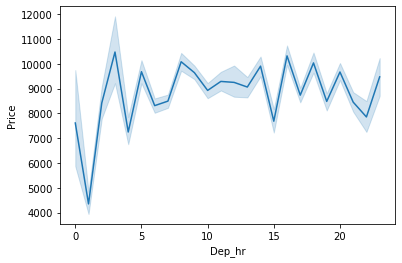

In [39]:
sns.lineplot(x = "Dep_hr", y = "Price", data = df)
plt.show()

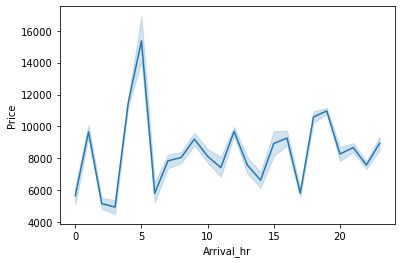

In [40]:
sns.lineplot(x = "Arrival_hr", y = "Price", data = df)
plt.show()

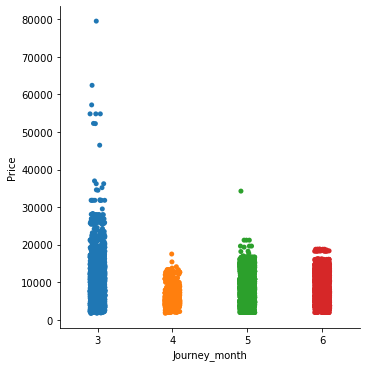

In [41]:
sns.catplot(x = "Journey_month", y = "Price", data = df)
plt.show()

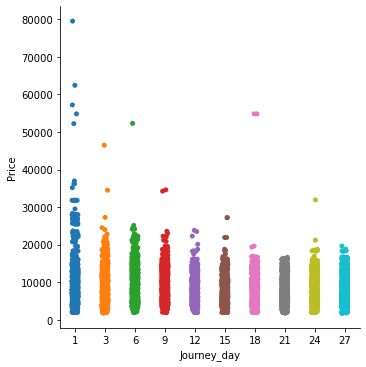

In [42]:
sns.catplot(x = "Journey_day", y = "Price", data = df)
plt.show()

Total_Stops                                     AxesSubplot(0.125,0.749828;0.110714x0.130172)
Price                                        AxesSubplot(0.257857,0.749828;0.110714x0.130172)
Journey_day                                  AxesSubplot(0.390714,0.749828;0.110714x0.130172)
Journey_month                                AxesSubplot(0.523571,0.749828;0.110714x0.130172)
Dep_hr                                       AxesSubplot(0.656429,0.749828;0.110714x0.130172)
Dep_min                                      AxesSubplot(0.789286,0.749828;0.110714x0.130172)
Arrival_hr                                      AxesSubplot(0.125,0.593621;0.110714x0.130172)
Arrival_min                                  AxesSubplot(0.257857,0.593621;0.110714x0.130172)
Duration_hr                                  AxesSubplot(0.390714,0.593621;0.110714x0.130172)
Duration_min                                 AxesSubplot(0.523571,0.593621;0.110714x0.130172)
Airline_Air India                            AxesSubplot(0.6

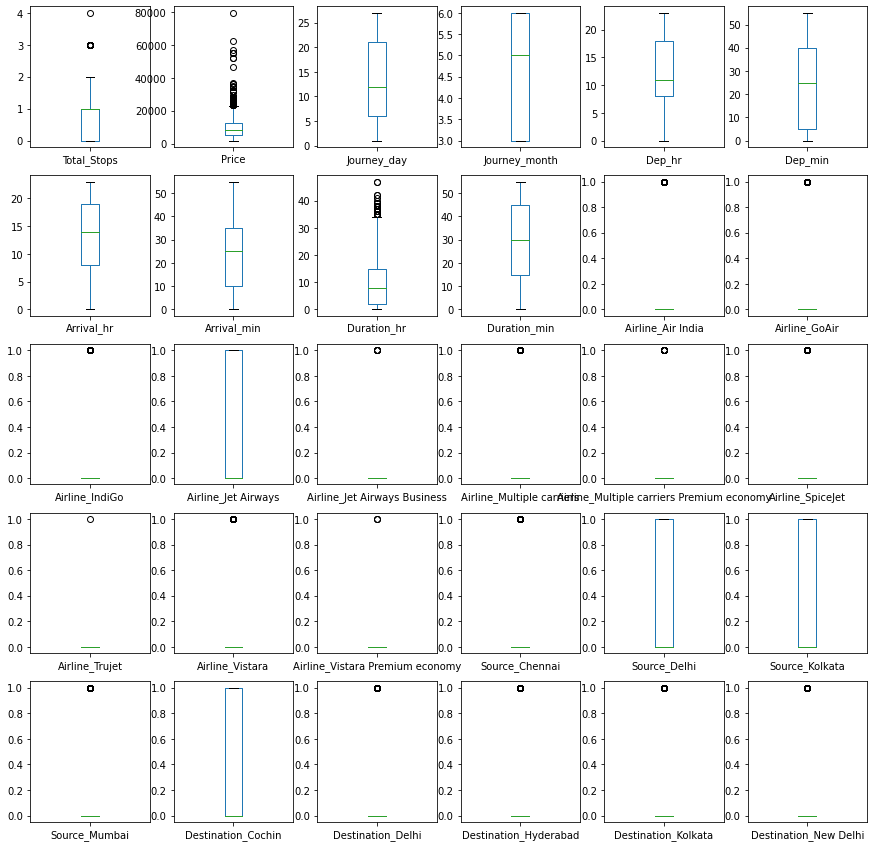

In [43]:
df.plot(kind='box',subplots=True,layout=(5,6),figsize=(15,15))

## Statistical Summary:

In [44]:
df.describe()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,...,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624,...,0.000281,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250
std,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817,...,0.016757,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation:

In [45]:
df.corr()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,...,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,...,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Journey_day,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,...,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
Journey_month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,...,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
Dep_hr,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,...,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Dep_min,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,...,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Arrival_hr,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,...,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_min,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,...,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
Duration_hr,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,...,-0.016268,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052
Duration_min,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,...,0.004952,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866


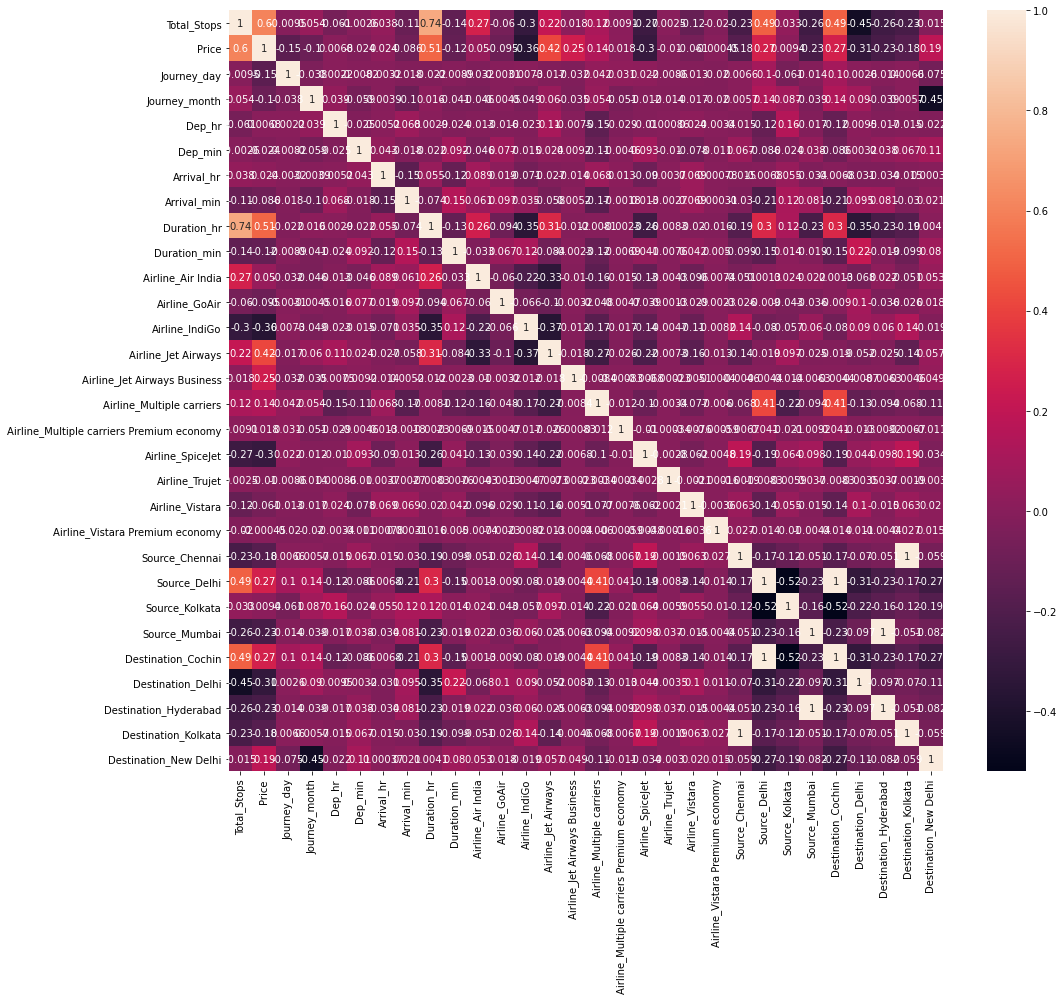

In [46]:
corr_hmap=df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr_hmap,annot=True)
plt.show()

## Removing Outliers:

In [47]:
# We are dropping the "Duration" column 
df.drop(["Duration"], axis = 1, inplace = True)

In [48]:
df.dtypes

Total_Stops                                    int64
Price                                        float64
Journey_day                                    int64
Journey_month                                  int64
Dep_hr                                         int64
Dep_min                                        int64
Arrival_hr                                     int64
Arrival_min                                    int64
Duration_hr                                    int64
Duration_min                                   int64
Airline_Air India                              uint8
Airline_GoAir                                  uint8
Airline_IndiGo                                 uint8
Airline_Jet Airways                            uint8
Airline_Jet Airways Business                   uint8
Airline_Multiple carriers                      uint8
Airline_Multiple carriers Premium economy      uint8
Airline_SpiceJet                               uint8
Airline_Trujet                                

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [50]:
new_df=df[(z<3).all(axis=1)]

In [51]:
new_df.shape

(7506, 30)

In [52]:
df.shape

(10682, 30)

In [53]:
                                                         ''' Data Loss '''

Data_loss = ((10682-7506)/10682)*100
Data_loss

29.732259876427637

The loss of data after removing the ouliers is 29.73%.

## Skewness:

In [54]:
new_df.skew()

Total_Stops                                  0.018956
Price                                        0.208493
Journey_day                                  0.116840
Journey_month                               -0.696326
Dep_hr                                       0.055054
Dep_min                                      0.241643
Arrival_hr                                  -0.407626
Arrival_min                                  0.181814
Duration_hr                                  0.566488
Duration_min                                -0.102010
Airline_Air India                            1.704413
Airline_GoAir                                0.000000
Airline_IndiGo                               1.484977
Airline_Jet Airways                          0.302418
Airline_Jet Airways Business                 0.000000
Airline_Multiple carriers                    1.886636
Airline_Multiple carriers Premium economy    0.000000
Airline_SpiceJet                             0.000000
Airline_Trujet              

Plotting the distribution plot for new dataframe to see the distribution as well as skewness present in the dataset.



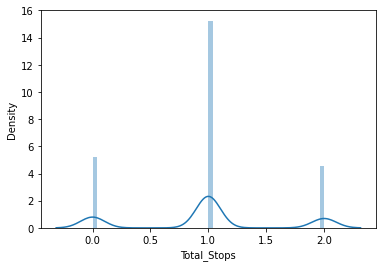

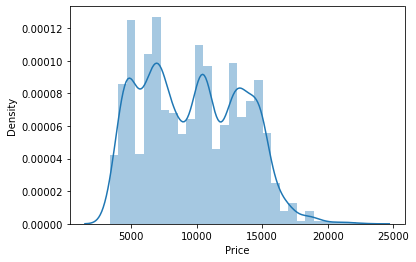

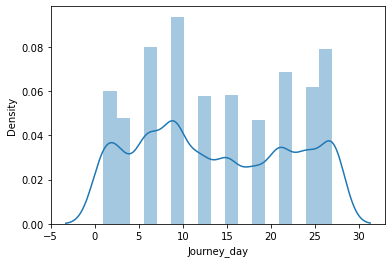

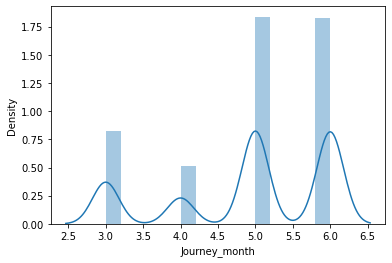

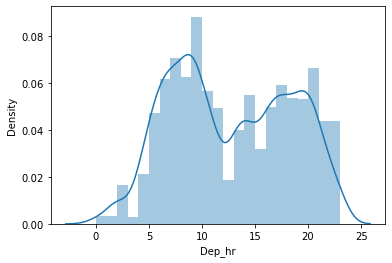

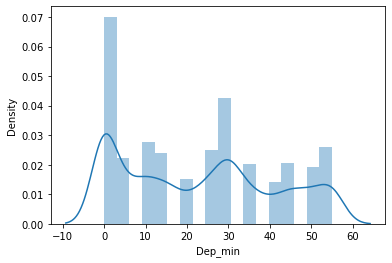

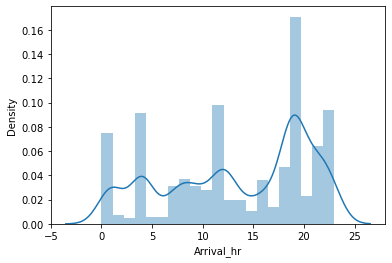

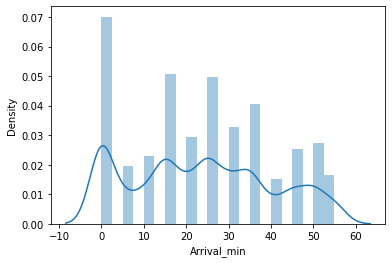

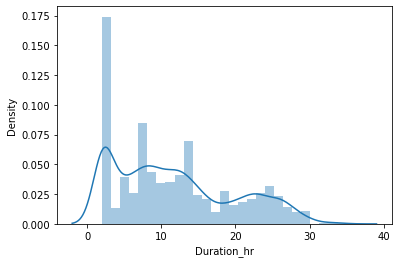

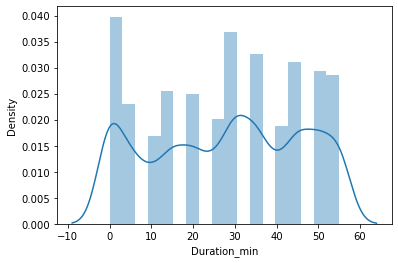

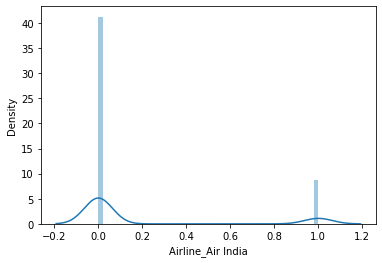

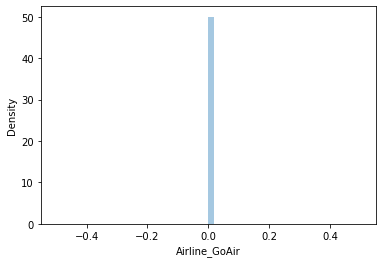

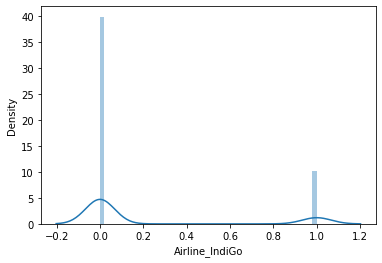

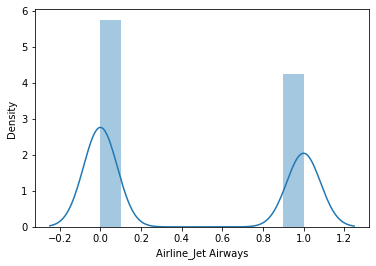

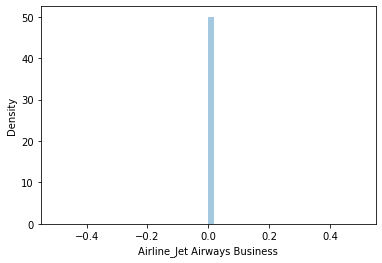

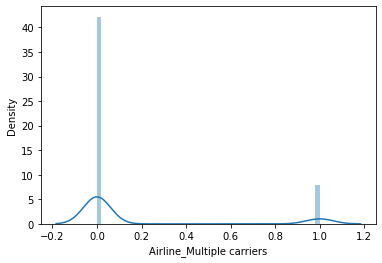

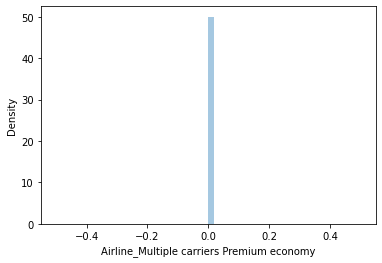

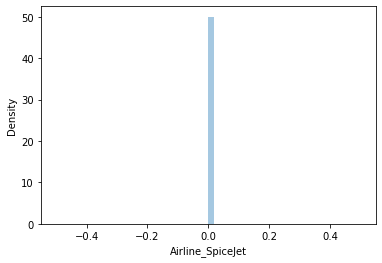

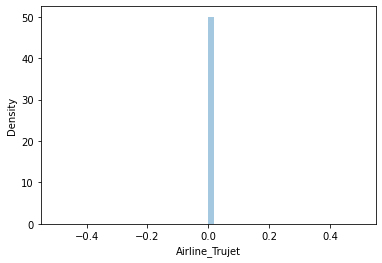

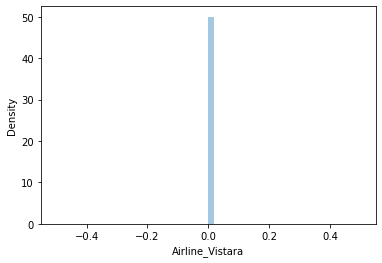

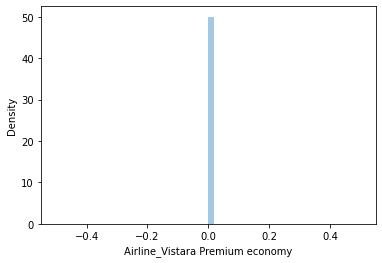

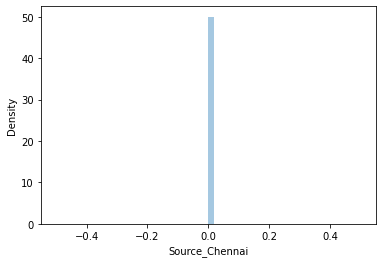

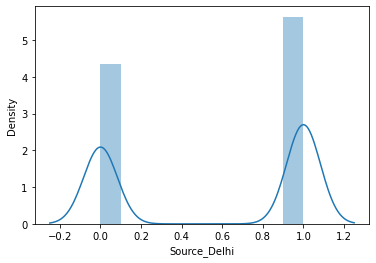

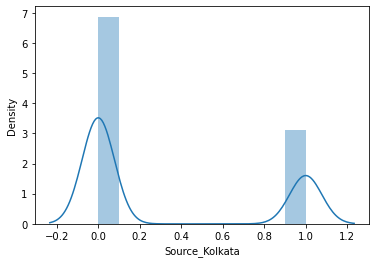

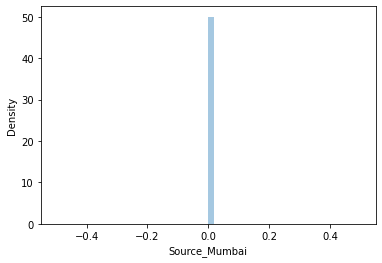

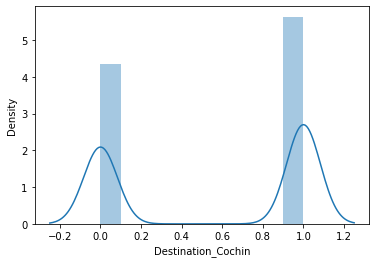

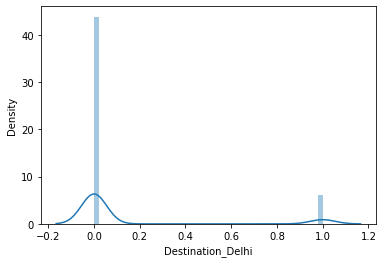

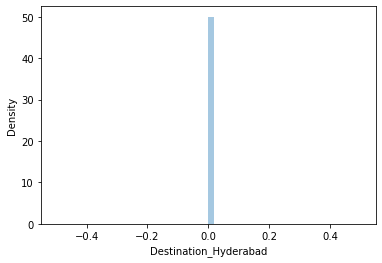

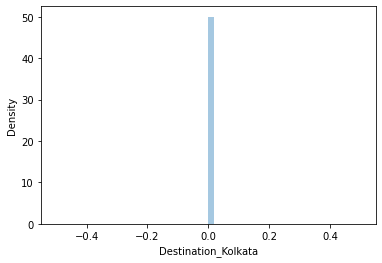

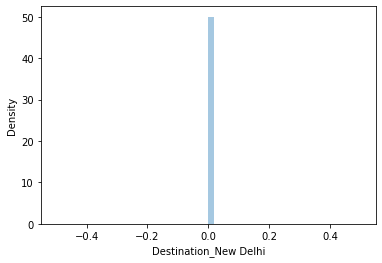

In [55]:
for i in new_df:
    sns.distplot(new_df[i])
    plt.show()

### Removing Skewness:

In [56]:
for i in new_df.columns:
    
    # we are using log transformation method to remove skewness
    if new_df.skew().loc[i]>0.5:
        new_df[i]=np.log1p(new_df[i])
        
        # we are using square method to remove skewness
        if new_df.skew().loc[i]<-0.5:
            new_df[i]=np.square(new_df[i])

In [57]:
new_df.skew()

Total_Stops                                  0.018956
Price                                        0.208493
Journey_day                                  0.116840
Journey_month                               -0.696326
Dep_hr                                       0.055054
Dep_min                                      0.241643
Arrival_hr                                  -0.407626
Arrival_min                                  0.181814
Duration_hr                                 -0.353412
Duration_min                                -0.102010
Airline_Air India                                 inf
Airline_GoAir                                0.000000
Airline_IndiGo                                    inf
Airline_Jet Airways                          0.302418
Airline_Jet Airways Business                 0.000000
Airline_Multiple carriers                         inf
Airline_Multiple carriers Premium economy    0.000000
Airline_SpiceJet                             0.000000
Airline_Trujet              

## Spliting the data into Feature and Target:

In [58]:
x=df.drop('Price',axis=1)
y=df['Price']

In [59]:
x.shape

(10682, 29)

In [60]:
y.shape

(10682,)

In [61]:
x.head()

,Total_Stops,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [63]:
                                       '''  Importing required libraries'''
    
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [64]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("We are getting the Best Accuracy is",maxAccu," on Random_state",maxRS)

We are getting the Best Accuracy is 0.672215797660782  on Random_state 57


### Train Test Split the data:

Train Test Split the data: We got the Best Accuracy is 0.672215797660782  on Random_state 57. Hence, using these values we are going to train our data using following models :-

Linear Regression

Decision Tree Regressor

Random Forest Regressor

Lasso

KNeighbors Regressor

GradientBoostingRegressor

SVR

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=57)

In [66]:
x_train.shape

(8545, 29)

In [67]:
x_test.shape

(2137, 29)

In [68]:
y_train.shape

(8545,)

In [69]:
y_test.shape

(2137,)

In [70]:
                                                    ''' Linear Regression '''

lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 67.97926449118867%


In [71]:
                                                    ''' Decision Tree Regressor '''

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 75.01592240685291%


In [72]:
                                                    ''' Random Forest Regressor '''

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 81.96055894668174%


In [73]:
                                                    ''' Lasso '''

ls=Lasso()
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 67.72484843955442%


In [74]:
                                                    ''' KNeighbors Regressor '''

knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 60.45121015766463%


In [75]:
                                                    ''' Gradient Boosting Regressor '''             

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 80.59522261055332%


In [76]:
                                                    ''' SVR '''

svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 0.13349168243534937%


### Cross Validation:

In [77]:
cvlr=cross_val_score(lr,x,y,cv=5).mean()
print("Cross Validation Score for Linear Regression is : ",cvlr)

Cross Validation Score for Linear Regression is :  0.619902731891642


In [78]:
cvdtr=cross_val_score(dtr,x,y,cv=5).mean()
print("Cross Validation Score for Decision Tree Regressor is : ",cvdtr)

Cross Validation Score for Decision Tree Regressor is :  0.703644397371583


In [79]:
cvrfr=cross_val_score(rfr,x,y,cv=5).mean()
print("Cross Validation Score for Random Forest Regressorr is : ",cvrfr)

Cross Validation Score for Random Forest Regressorr is :  0.8137309408036659


In [80]:
cvls=cross_val_score(ls,x,y,cv=5).mean()
print("Cross Validation Score for Lasso is : ",cvls)

Cross Validation Score for Lasso is :  0.6196947873656187


In [81]:
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print("Cross Validation Score for KNeighborsRegressor is : ",cvknn)

Cross Validation Score for KNeighborsRegressor is :  0.5850009290076714


In [82]:
cvgbr=cross_val_score(gbr,x,y,cv=5).mean()
print("Cross Validation Score for Gradient Boosting Regressor is : ",cvgbr)

Cross Validation Score for Gradient Boosting Regressor is :  0.7688862028217957


In [83]:
cvsvr=cross_val_score(svr,x,y,cv=5).mean()
print("Cross Validation Score for SVR is : ",cvsvr)

Cross Validation Score for SVR is :  0.0037593589359373957


### Overfitting & Underfitting:

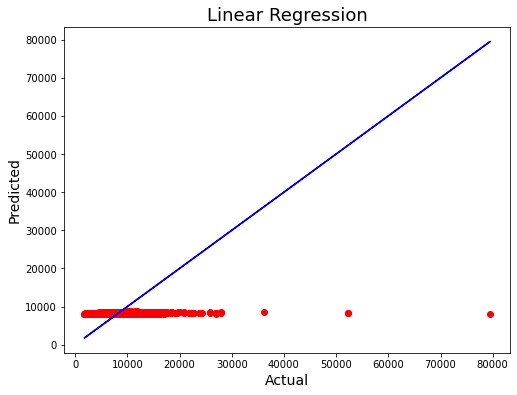

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

### Hyper Parameter Tuning:

We are selecting Random Forest Regressor as our best model as it has least difference between it's Accuracy score and CV score.

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
parameter={'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}

In [87]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [88]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000]})

In [89]:
                                ''' Getting the best parameters using GridSearchCV '''

GCV.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 400}

In [93]:
flight_final=RandomForestRegressor(max_depth=30, max_features='auto', min_samples_leaf=1, min_samples_split=10, n_estimators= 400)
flight_final.fit(x_train,y_train)
pred=flight_final.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

83.98125901023631


### We are getting the model accuracy and cross validation score both as 83.98% which shows our model is performing well.

### Saving the model:

In [94]:
import joblib
joblib.dump(flight_final,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

In [95]:
flight_model = joblib.load(open('Flight_Price_Prediction.pkl','rb'))
result = flight_model.score(x_test,y_test)
print(result)

0.8398125901023631


In [96]:
Conclusion = pd.DataFrame([flight_model.predict(x_test)[:],rfr.predict(x_test)[:]],index=["Predicted","Original"])

In [97]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136
Predicted,7789.981672,7508.899685,3909.799716,13893.732807,8137.918906,7552.717811,8539.975223,11186.174438,12859.698367,3600.316434,...,6550.838535,8526.654604,3865.537479,13045.572516,6410.194377,6848.250588,14035.72259,4381.336981,5338.969854,5668.285464
Original,7781.820000,7546.360000,3878.811111,13940.380000,8636.660000,7317.310000,8445.990000,11124.650000,13586.020833,3595.316000,...,6453.260000,8012.506667,3855.686667,13464.030000,6437.020000,6566.498333,14289.54000,3602.480000,5196.160000,5777.260000


                                                          ---- --:-- ----